In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# datasrc = "/Users/bryan/Studio/tools/mix_10.csv"
# datasrc = '/Users/bryan/Documents/SeqDataSets/12mix/12mix.csv'
datasrc = '/Users/bryan/Studio/seq/data/samples/20.csv'
df = pd.read_csv(datasrc)

chose 200 cpds from (600, 24)


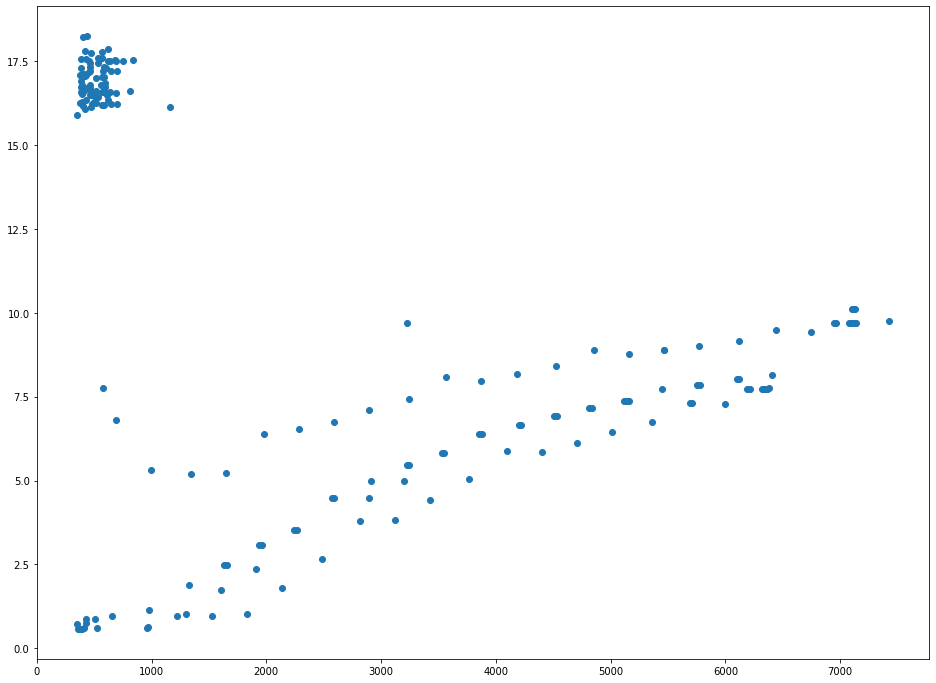

In [3]:
df.dropna(axis=1, inplace=True)
df.sort_values('Vol', ascending=False, inplace=True)
min_N = 200
top_N = int(df.shape[0]/10)
if top_N < min_N:
    top_N = min_N
dftop = df.head(top_N)
# dftop = df
x = dftop['Mass']
y = dftop['RT']
z = np.polyfit(x, y, 1)
print("chose {} cpds from {}".format(top_N, df.shape))
plt.figure(figsize=(16, 12))
# plt.scatter(df['Mass'], df['RT'])
plt.scatter(dftop['Mass'], dftop['RT'])
# plt.plot(x, z[0]*x+z[1])

In [4]:
upleft_dots = df[(df.Mass < 1000) & (df.RT > 15)]
df = df.drop(upleft_dots.index)

In [5]:
df = df[['Mass', 'RT', 'Vol']]

In [6]:
TAG = 694.2397

In [7]:
base5p_df = pd.DataFrame([[18.0106, 0.66, 10000],
                          [347.0631, 0.99, 10000],
                          [323.0519, 0.99, 10000], 
                          [363.058, 0.99, 10000], 
                          [324.0359, 0.99, 10000]], columns=['Mass', 'RT', 'Vol'])
base3p_df = pd.DataFrame([[694.2397, 1.66, 20000]], columns=['Mass', 'RT', 'Vol'])
df = df.append(base5p_df, sort=True).reindex()
df = df.append(base3p_df, sort=True).reindex()

In [8]:
base5p_df = pd.DataFrame([[18.0106, 0.66, 10000],
                          [347.0631, 0.99, 10000],
                          [323.0519, 0.99, 10000], 
                          [363.058, 0.99, 10000], 
                          [324.0359, 0.99, 10000]], columns=['Mass', 'RT', 'Vol'])
base5p_df

base3p_df = pd.DataFrame([[694.2397, 1.66, 20000]], columns=['Mass', 'RT', 'Vol'])
base3p_df

dftop = dftop.append(base5p_df, sort=True).reindex()
dftop = dftop.append(base3p_df, sort=True).reindex()

In [24]:
# df3p_mass_np = df5p_mass_np = np.array(dftop['Mass'])
seq_mass = 7079.0823
df3p_mass = dftop[(dftop.Mass > TAG+200) & (dftop.Mass < seq_mass + 1)]['Mass']
df3p_mass_np = np.array(df3p_mass)
df5p_mass = dftop[(dftop.Mass > 535) & (dftop.Mass < seq_mass + 18.0106 + 80 + 1)]['Mass']
df5p_mass_np = np.array(df5p_mass)
print(df3p_mass_np.shape, df5p_mass_np.shape)

(93,) (144,)


In [25]:
mass_sum_np = df3p_mass_np[:, np.newaxis] + df5p_mass_np
mass_sum_np.shape

(93, 144)

In [26]:
mass_sum_1 = np.round(mass_sum_np, 1)
mass_sum_2 = np.round(mass_sum_np, 2)
mass_sum_3 = np.round(mass_sum_np, 3)

In [27]:
sum_value = round(seq_mass + 18.0106, 1)
end_5p = sum_value - 80 - TAG
masses = df.Mass
print(end_5p)
BIAS = 0.1
end5p_idxs = masses[(masses>=end_5p-BIAS) & (masses<=end_5p+BIAS)].index
df.loc[end5p_idxs]

6322.8603


,Mass,RT,Vol
2,6322.8565,7.741,13695730
2,323.0519,0.990,10000


In [28]:
mass_sum_df = pd.DataFrame(mass_sum_np)
mass_sum_df1 = pd.DataFrame(mass_sum_1)

In [29]:
sum_value = round(seq_mass + 18.0106, 1)
tmp = mass_sum_df1[(mass_sum_df1 >= sum_value-0.1) & (mass_sum_df1 <= sum_value+0.1)]
# print(mass_sum_df1)
final_idx_pairs = list(tmp[tmp.notnull()].stack().index)
df3_idxs = [pair[0] for pair in final_idx_pairs]
df5_idxs = [pair[1] for pair in final_idx_pairs]
print("df3 idxs {} \ndf5 idxs {}".format(len(df3_idxs), len(df5_idxs)))
df5_idxs.extend(list(end5p_idxs))
# print(df5_idxs)

df3 idxs 38 
df5 idxs 38


In [30]:
df3p_mass.iloc[df3_idxs]

17     5118.6460
18     3527.4665
21     2242.3037
24     4812.6211
25     4507.5779
27     3222.4211
28     3856.5113
30     5752.7276
31     1937.2633
33     2571.3524
35     4201.5561
38     5447.6963
39     2916.3990
42     1632.2230
45     3569.5960
46     6097.7792
50     1978.4135
52     4854.7562
54     2284.4371
56     6443.9541
57     2589.4766
59     5159.8026
61     3874.6356
68     4525.7034
69     1327.1827
70     3240.5467
75     2895.4995
76     4180.6582
81     6402.8163
81     6402.8163
81     6402.8163
87     1344.3224
100    5769.8585
104     982.1362
112    1649.3626
137    6114.9026
158     999.2753
178    5464.8200
Name: Mass, dtype: float64

In [31]:
df3_idxs = df3p_mass.iloc[df3_idxs].index
df5_idxs = df5p_mass.iloc[df5_idxs].index

idxs 41 df3_idxs 36 df5_idxs 39


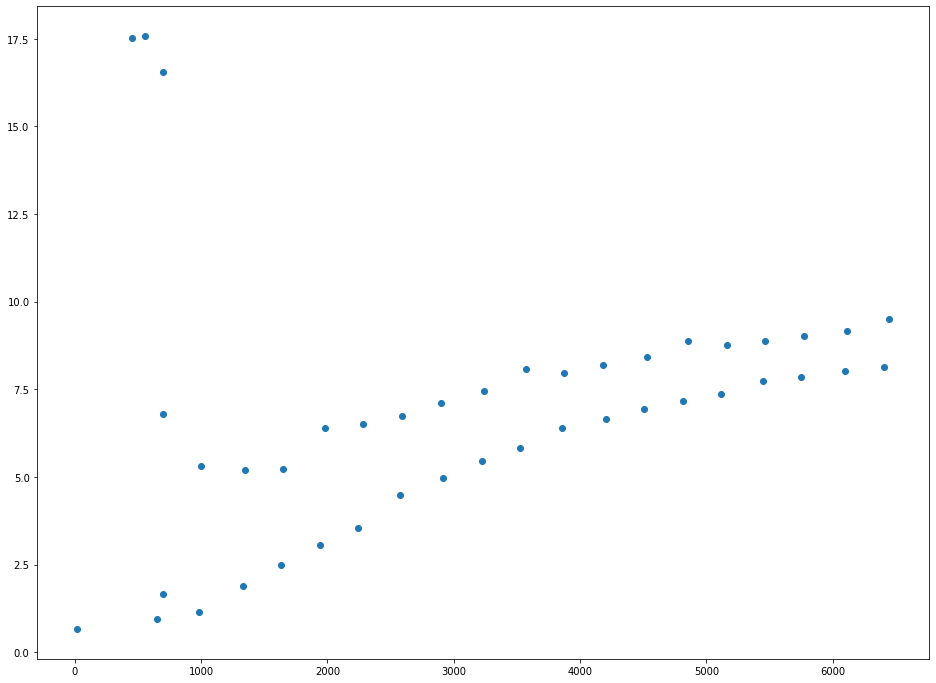

In [33]:
plt.figure(figsize=(16, 12))

idxs = list()
df3_idxs = list(set(df3_idxs))
idxs.extend(df3_idxs)
df5_idxs = list(set(df5_idxs))
idxs.extend(df5_idxs)
idxs = list(set(idxs))
print("idxs {} df3_idxs {} df5_idxs {}".format(len(idxs), len(df3_idxs), len(df5_idxs)))
plt.scatter(dftop.loc[idxs]['Mass'], dftop.loc[idxs]['RT'])
# dftop.loc[idxs].to_csv('data/5p.csv')

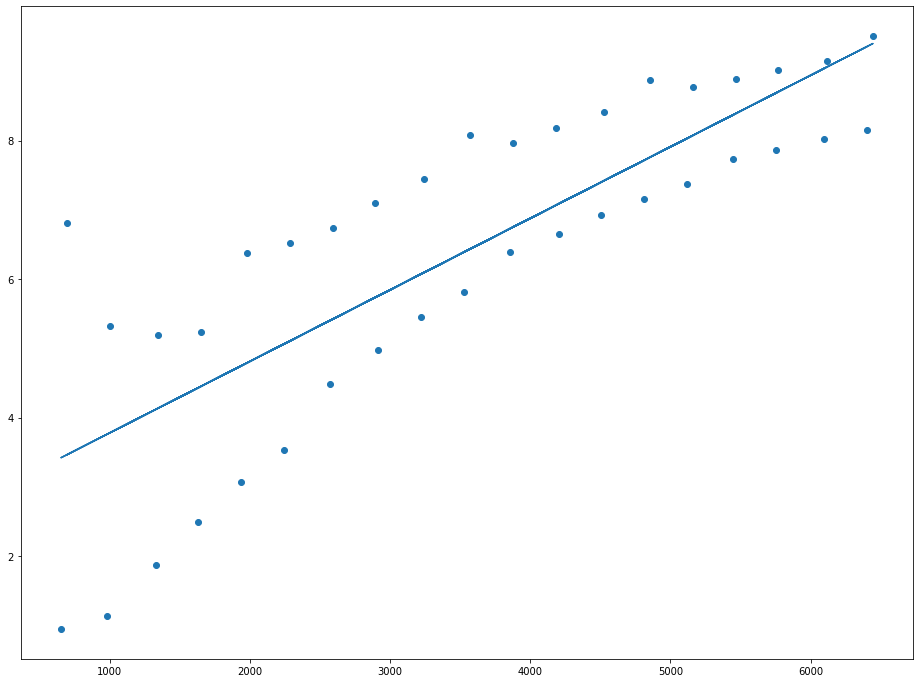

In [34]:
tmpdf = dftop.loc[idxs]
upleft_dots = tmpdf[(tmpdf.Mass < 1000) & (tmpdf.RT > 15)]
tmpdf = tmpdf.drop(upleft_dots.index)
x = tmpdf['Mass']
y = tmpdf['RT']
z = np.polyfit(x, y, 1)
# print("chose {} cpds from {}".format(top_N, df.shape))
plt.figure(figsize=(16, 12))
# plt.scatter(df['Mass'], df['RT'])
plt.scatter(tmpdf['Mass'], tmpdf['RT'])
plt.plot(x, z[0]*x+z[1])

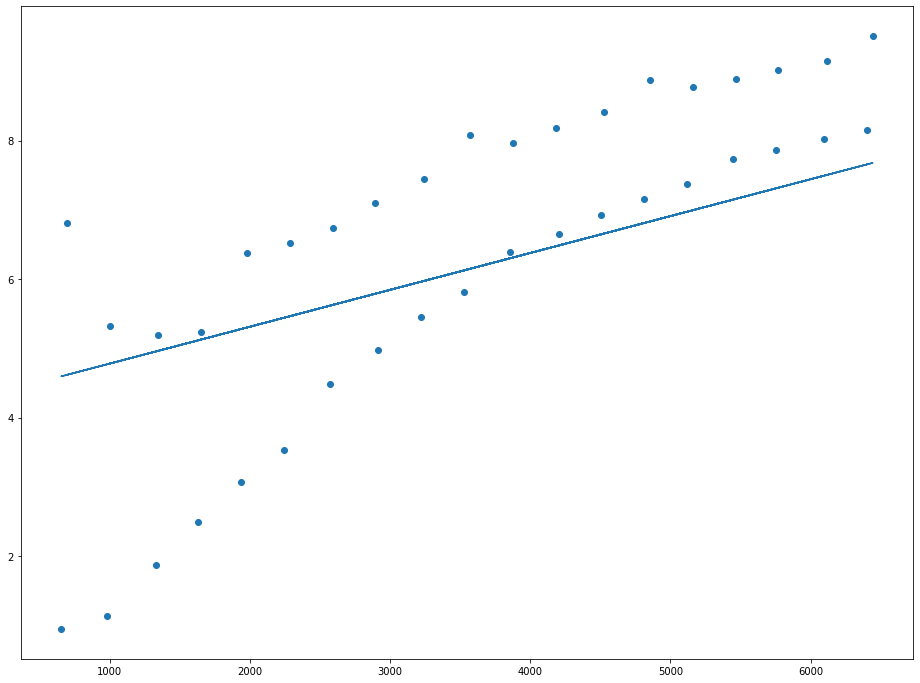

In [35]:
plt.figure(figsize=(16, 12))
# plt.scatter(df['Mass'], df['RT'])
plt.scatter(tmpdf['Mass'], tmpdf['RT'])
plt.plot(x, (z[0]-0.0005)*x+z[1]+1.5)